# LSTM 簡易股票預測

tensorflow 無 validation 版本
只看關盤價格

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("data/prices.csv")
df.head(5)

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [7]:
stock_prices = df['close'].values.reshape(-1, 1)
stock_prices

array([[125.839996],
       [119.980003],
       [114.949997],
       ...,
       [ 53.529999],
       [ 45.450001],
       [ 53.630001]])

In [8]:
# Normalizing Data
scaler = MinMaxScaler(feature_range=(0, 1))
stock_prices_normalized = scaler.fit_transform(stock_prices)

In [9]:
# Preparing Data for LSTM
X, y = [], []
for i in range(len(stock_prices_normalized) - 60):
    X.append(stock_prices_normalized[i:i + 60, 0])
    y.append(stock_prices_normalized[i + 60, 0])
X, y = np.array(X), np.array(y)

In [10]:
# Reshaping Data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [11]:
# Building and Training the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10


c:\Users\Leo\anaconda3\envs\side\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26601/26601 ━━━━━━━━━━━━━━━━━━━━ 418s 16ms/step - loss: 0.0028
Epoch 2/10
26601/26601 ━━━━━━━━━━━━━━━━━━━━ 414s 16ms/step - loss: 0.0026
Epoch 3/10
26601/26601 ━━━━━━━━━━━━━━━━━━━━ 414s 16ms/step - loss: 4.8781e-04
Epoch 4/10
26601/26601 ━━━━━━━━━━━━━━━━━━━━ 412s 15ms/step - loss: 1.8210e-04
Epoch 5/10
26601/26601 ━━━━━━━━━━━━━━━━━━━━ 413s 16ms/step - loss: 1.1861e-04
Epoch 6/10
26601/26601 ━━━━━━━━━━━━━━━━━━━━ 416s 16ms/step - loss: 9.1882e-05
Epoch 7/10
26601/26601 ━━━━━━━━━━━━━━━━━━━━ 415s 16ms/step - loss: 7.1198e-05
Epoch 8/10
26601/26601 ━━━━━━━━━━━━━━━━━━━━ 416s 16ms/step - loss: 6.2403e-05
Epoch 9/10
26601/26601 ━━━━━━━━━━━━━━━━━━━━ 415s 16ms/step - loss: 6.9427e-05
Epoch 10/10
26601/26601 ━━━━━━━━━━━━━━━━━━━━ 419s 16ms/step - loss: 4.8092e-05


In [12]:
# Making Predictions
predictions = model.predict(X)

26601/26601 ━━━━━━━━━━━━━━━━━━━━ 133s 5ms/step


In [13]:
# Denormalizing Predictions
predictions_denormalized = scaler.inverse_transform(predictions)

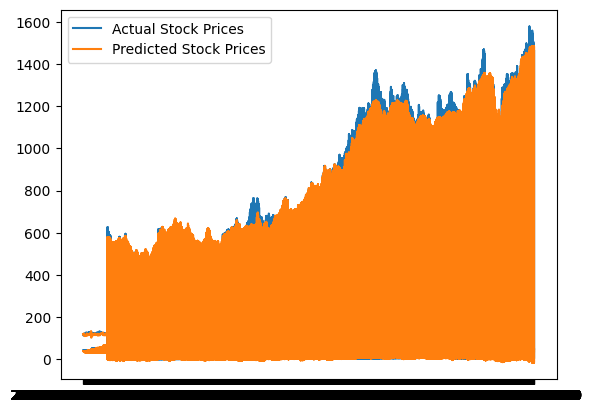

In [14]:
# Plotting Results
plt.plot(df['date'][60:], stock_prices[60:], label='Actual Stock Prices')
plt.plot(df['date'][60:], predictions_denormalized, label='Predicted Stock Prices')
plt.legend()
plt.show()

In [15]:
# 計算誤差
from sklearn.metrics import mean_squared_error
mean_squared_error(stock_prices[60:], predictions_denormalized)


85.41190452631004

基本能確認LSTM模型預測根源數值相差不大 mean_squared為 85 但缺乏 validation 驗證